In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('baseball')
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


## Exploratory Data Analysis

In [4]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
data.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


#### Lets check the null values without using visualization

In [6]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

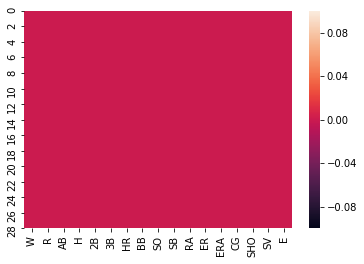

In [7]:
#Check the Null value through graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull())
plt.show()

In [8]:
data = pd.DataFrame(data=data)
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [9]:
data.shape

(30, 17)

In [10]:
data.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [11]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [12]:
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [13]:
dfcor = data.corr()
dfcor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


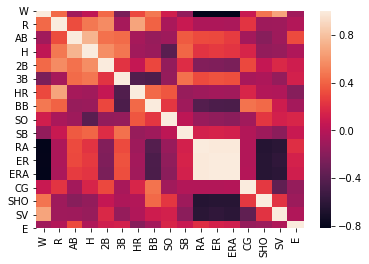

In [14]:
sns.heatmap(dfcor)

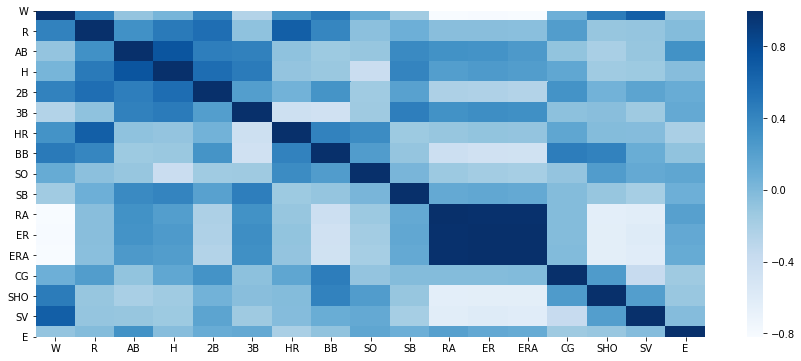

In [15]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='Blues',annot=False)

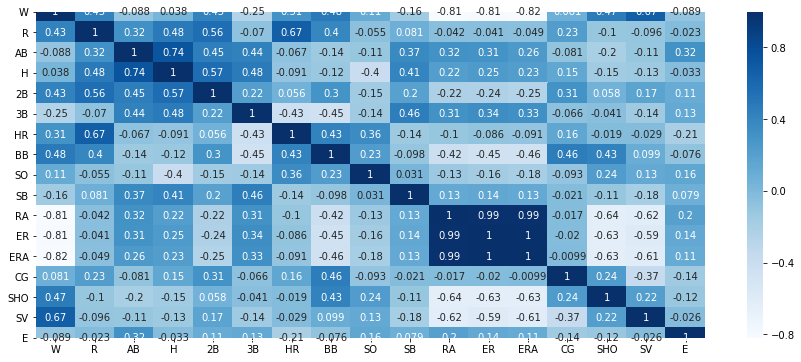

In [16]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='Blues',annot=True)

#### Removing the Outliers

In [17]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(30, 17)
(29, 17)


#### Checking Skewness and Removing it

In [18]:
#Check Skewness 
data.skew()
#there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [19]:
#Treating the skewness using log
import numpy as np
for col in data.columns:
#Here complete column name has been passed
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [20]:
#Lets Again Check the Skewness
data.skew()

W      0.047089
R      0.744813
AB     0.183437
H      0.628584
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.325962
SHO   -0.589640
SV     0.163057
E      0.632916
dtype: float64

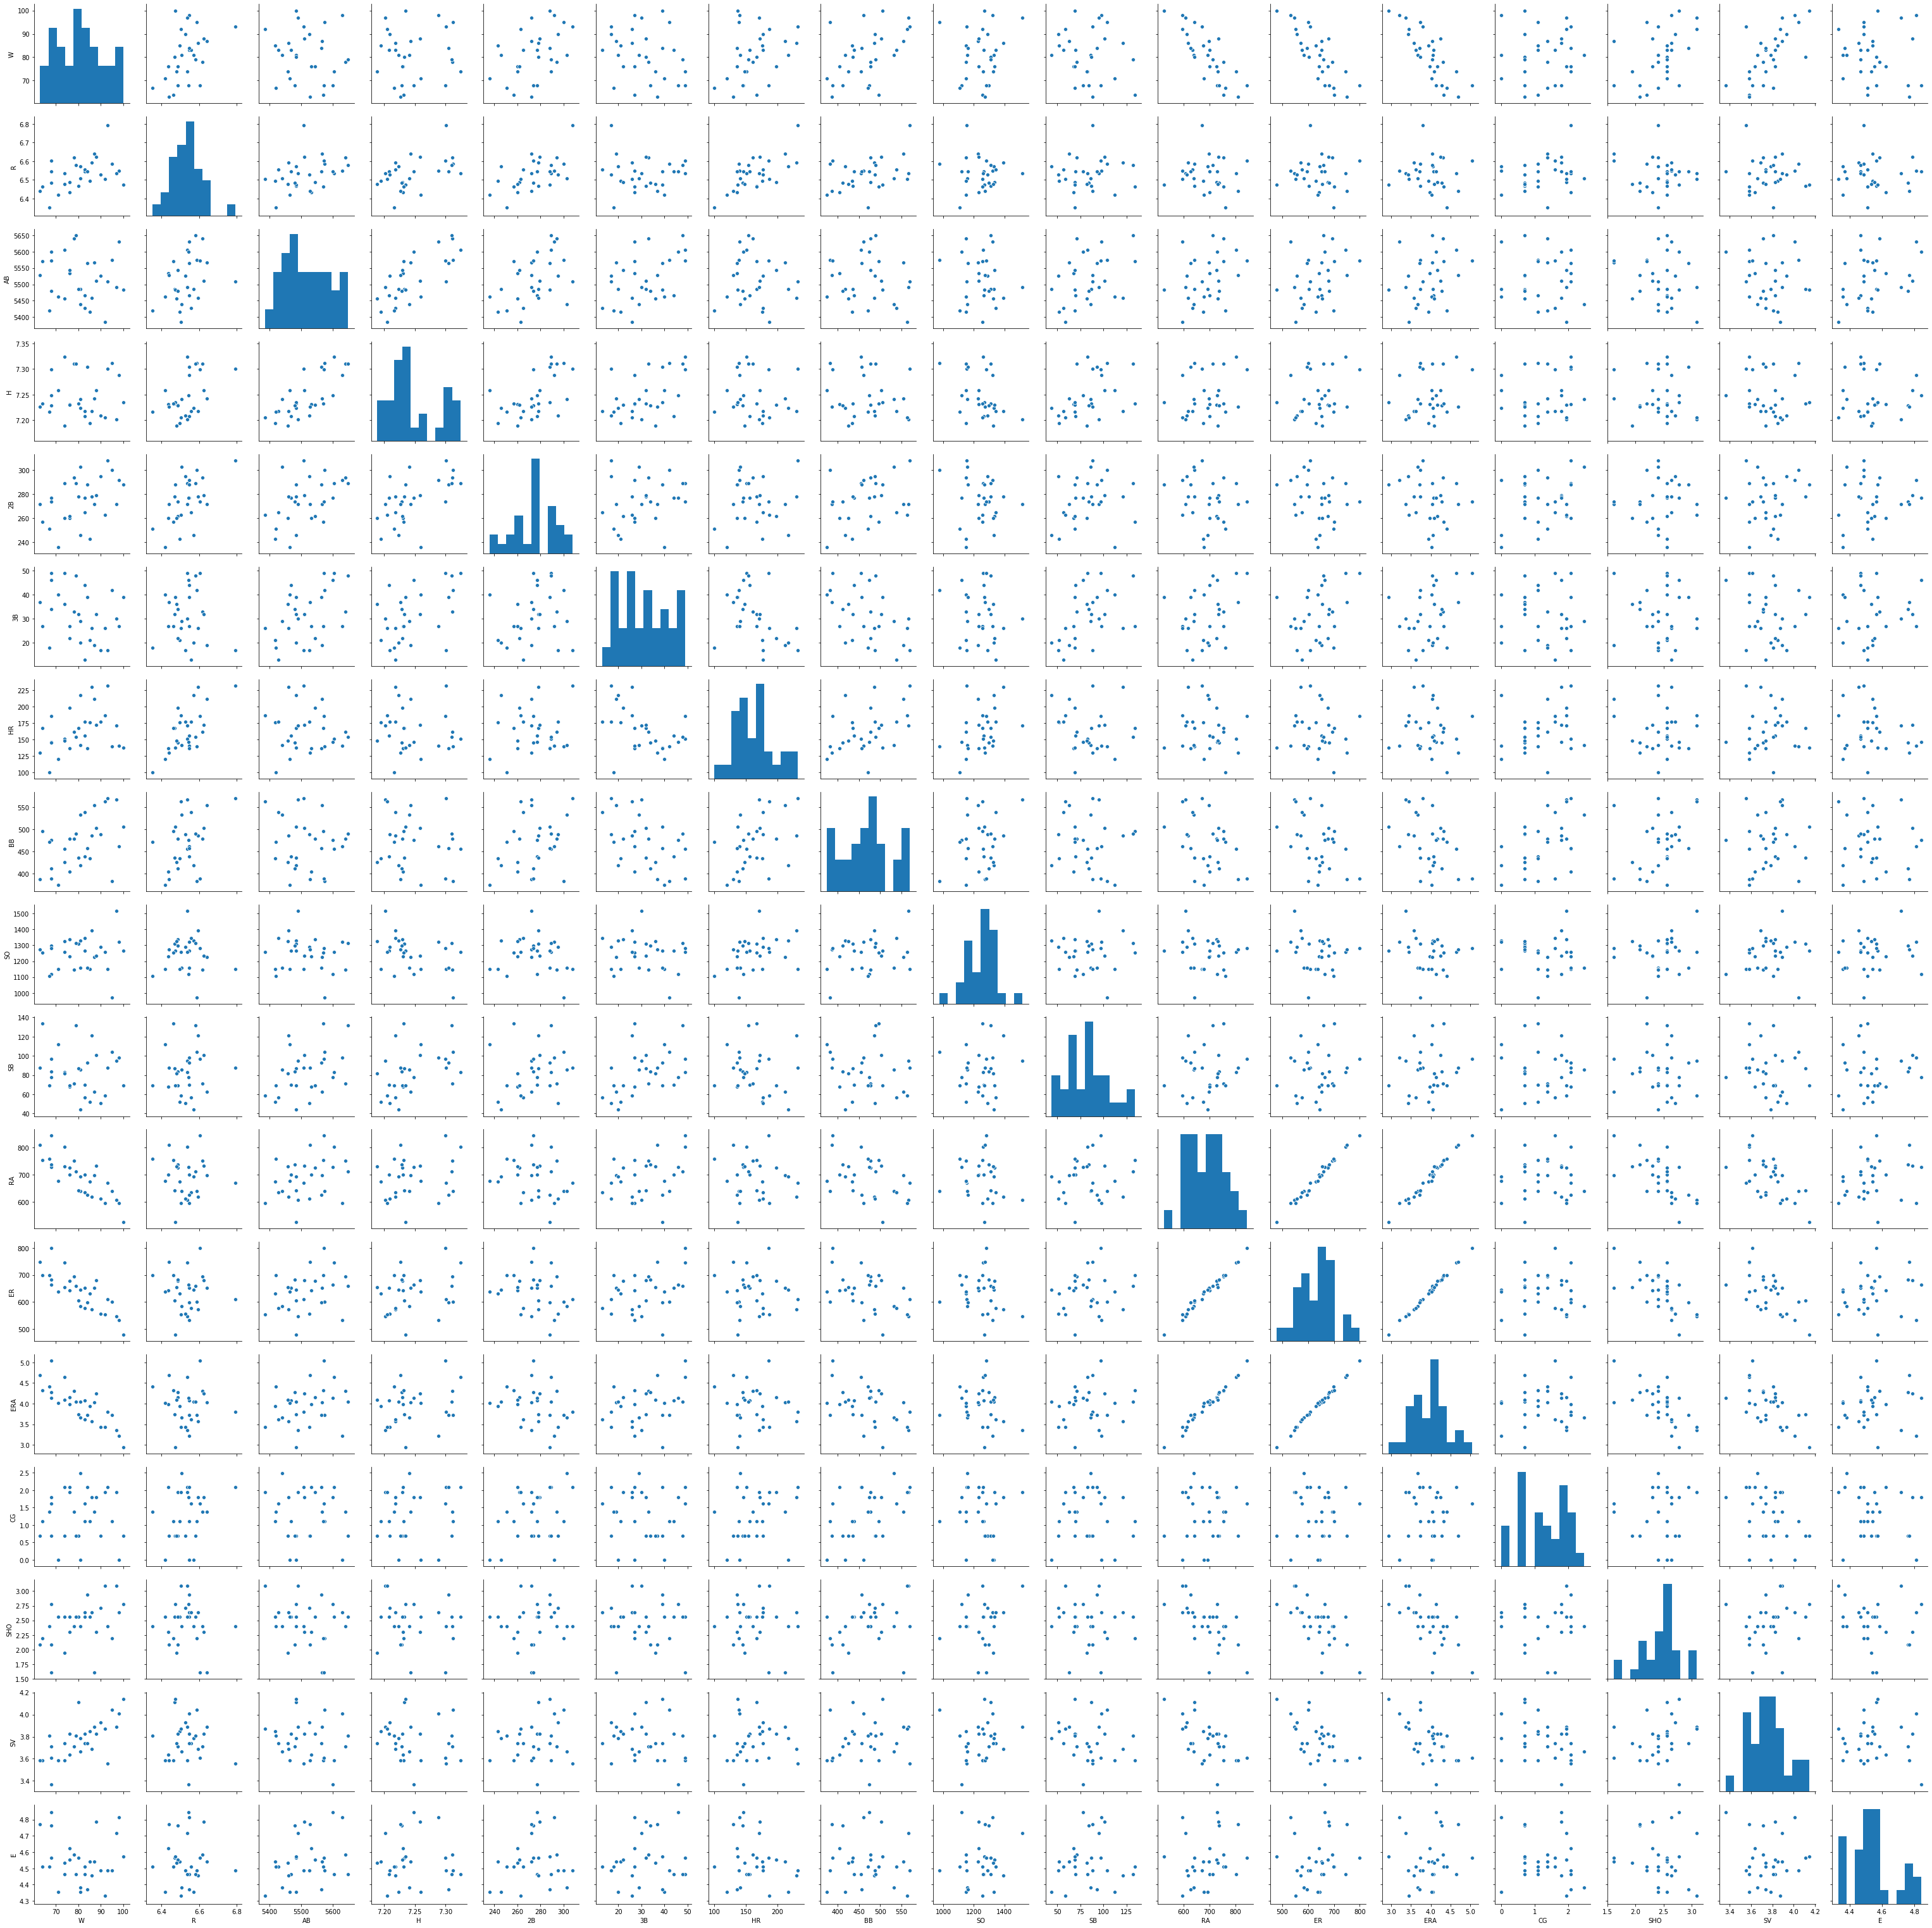

In [21]:
#Lets Check the pairplot using seaborn Library
import seaborn as sns
sns.pairplot(data)
plt.show()

### LinePlot

In [22]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

#### Let's see how input variables change with output variables 

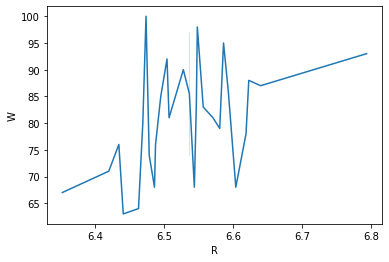

In [23]:
#Lets check the how Run is changing with respect to Win
sns.lineplot(data["R"],data["W"])
plt.show()

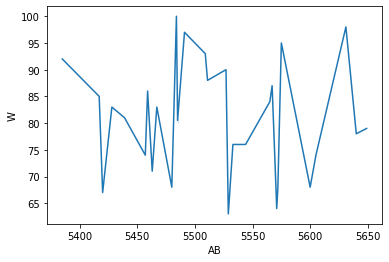

In [24]:
#Lets check the how At Bat is changing with respect to Win
sns.lineplot(data["AB"],data["W"])
plt.show()

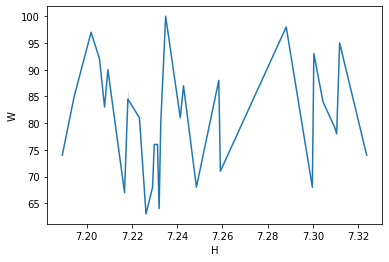

In [25]:
#Lets check the how Hits is changing with respect to Win
sns.lineplot(data["H"],data["W"])
plt.show()

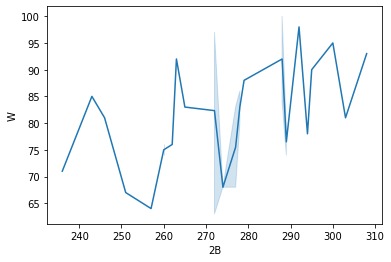

In [26]:
#Lets check the how Doubles is changing with respect to Win
sns.lineplot(data["2B"],data["W"])
plt.show()

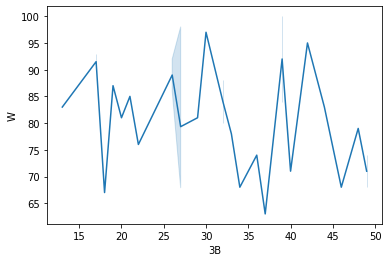

In [27]:
#Lets check the how Triples is changing with respect to Win
sns.lineplot(data["3B"],data["W"])
plt.show()

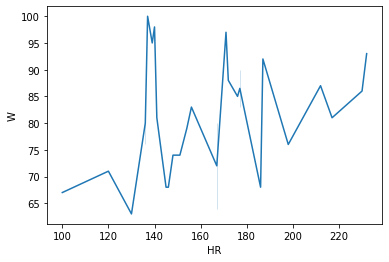

In [28]:
#Lets check the how Homeruns is changing with respect to Win
sns.lineplot(data["HR"],data["W"])
plt.show()

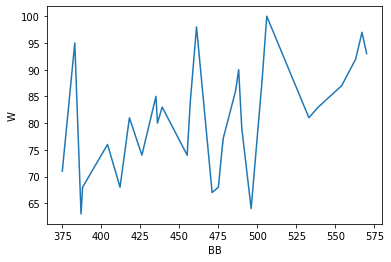

In [29]:
#Lets check the how Walks is changing with respect to Win
sns.lineplot(data["BB"],data["W"])
plt.show()

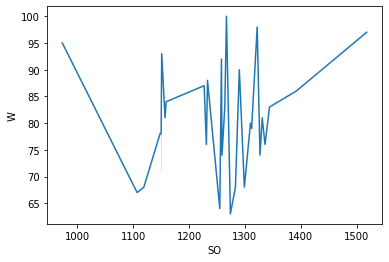

In [30]:
#Lets check the how Strikeouts is changing with respect to Win
sns.lineplot(data["SO"],data["W"])
plt.show()

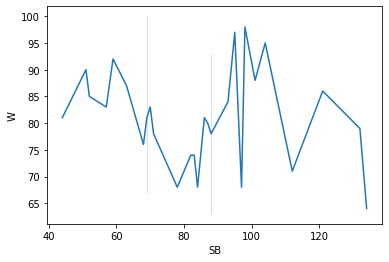

In [31]:
#Lets check the how Stolen Bases is changing with respect to Win
sns.lineplot(data["SB"],data["W"])
plt.show()


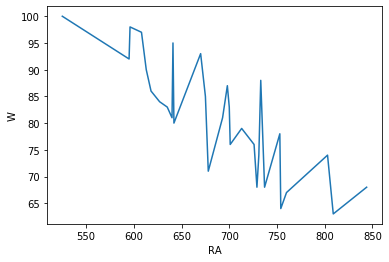

In [32]:
#Lets check the how Runs Allowed is changing with respect to Win
sns.lineplot(data["RA"],data["W"])
plt.show()
##The below graph  shows that with increase in Runs Allowed has a reverse impact on win

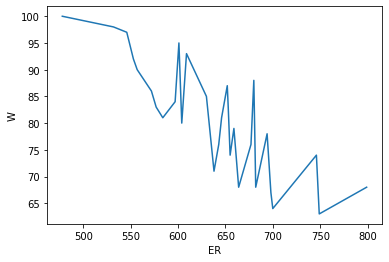

In [33]:
#Lets check the how Earened Run is changing with respect to Win
sns.lineplot(data["ER"],data["W"])
plt.show()

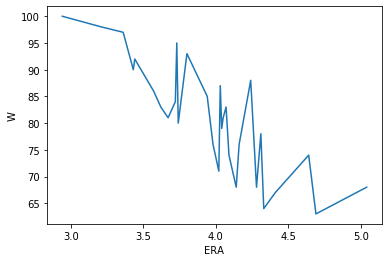

In [34]:
#Lets check the how Earened Run Average is changing with respect to Win
sns.lineplot(data["ERA"],data["W"])
plt.show()

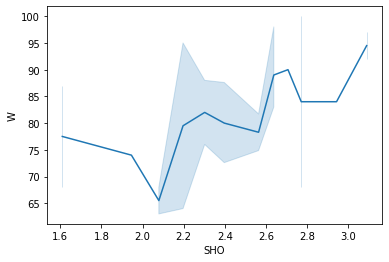

In [35]:
#Lets check the how Shutouts is changing with respect to Win
sns.lineplot(data["SHO"],data["W"])
plt.show()

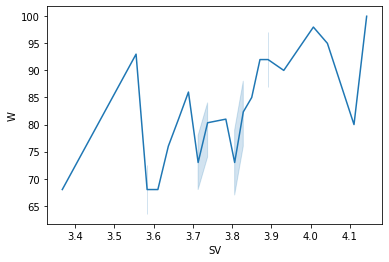

In [36]:
#Lets check the how Saves is changing with respect to Win
sns.lineplot(data["SV"],data["W"])
plt.show()

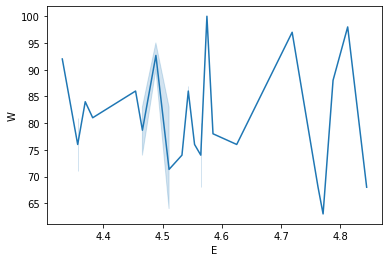

In [37]:
#Lets check the how Erros is changing with respect to Win
sns.lineplot(data["E"],data["W"])
plt.show()

#### Plotting Boxplot through Iteration

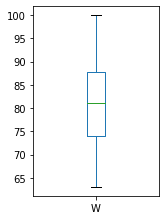

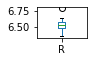

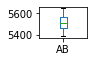

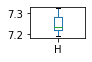

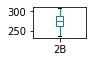

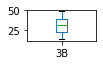

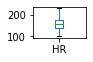

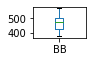

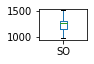

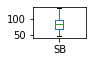

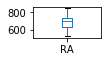

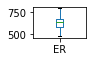

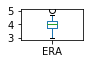

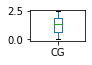

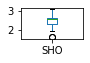

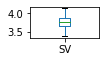

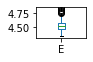

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    data.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

### Plotting Displot Through Iteration

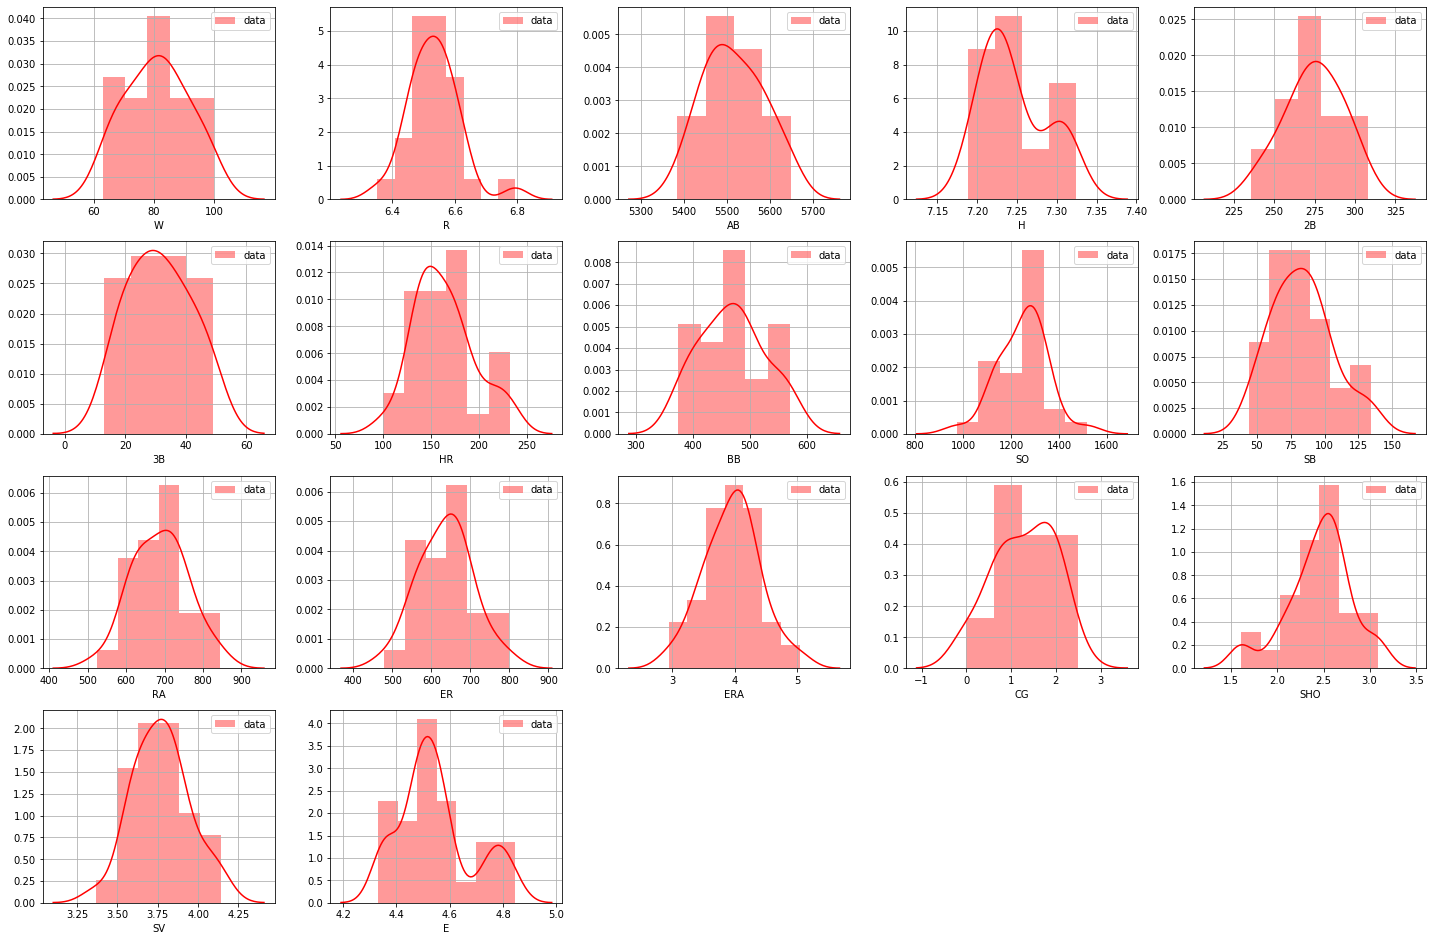

In [39]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(data[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

### Plotting Data using Scatter Plot

In [40]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

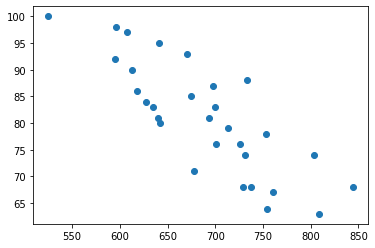

In [41]:
plt.scatter(data['RA'],data['W'])

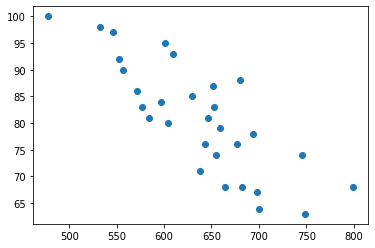

In [42]:
plt.scatter(data['ER'],data['W'])

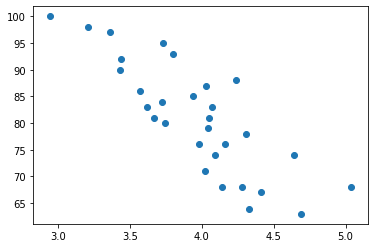

In [43]:
plt.scatter(data['ERA'],data['W'])

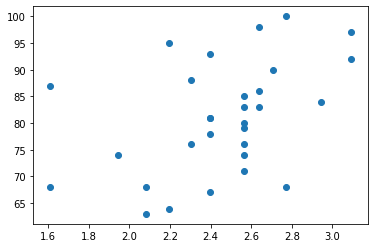

In [44]:
plt.scatter(data['SHO'],data['W'])

### Column Plot

In [45]:
collist = data.columns.values
ncols=12
nrows=10

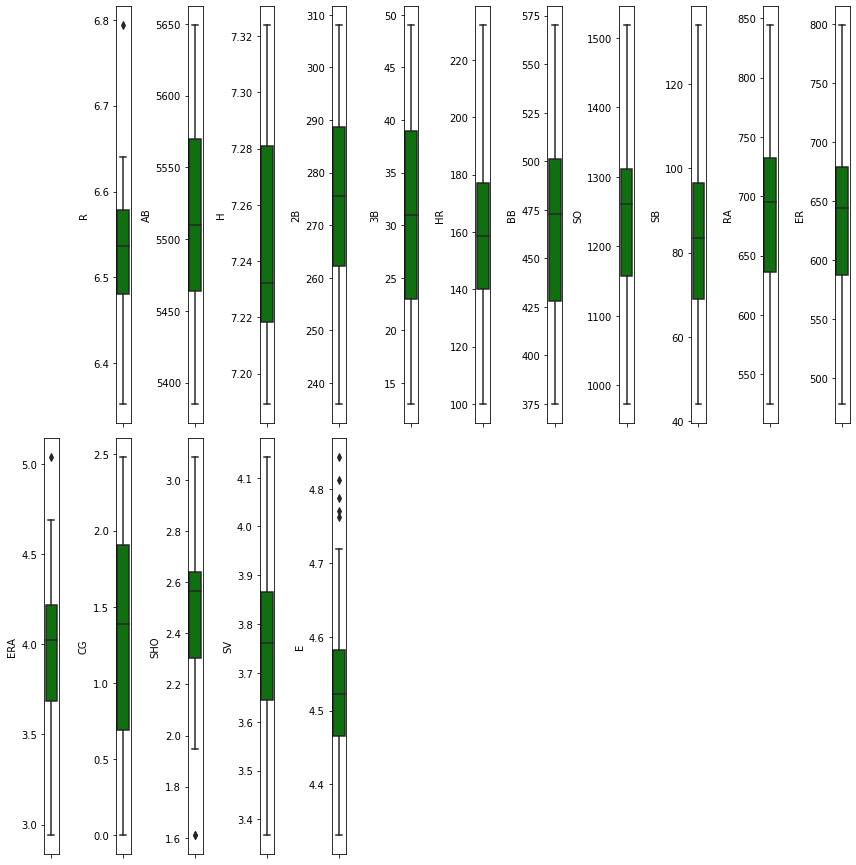

In [46]:
plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data[collist[i]],color='green',orient='v')
    plt.tight_layout()

#### Separating X and Y Variable

In [47]:
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,6.586172,5575,7.311886,300,42,139,383,973,104,641,601,3.73,1.098612,2.197225,4.043051,4.488636
1,83,6.546785,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,1.098612,2.564949,3.828641,4.465908
2,81,6.507278,5439,7.241366,303,29,141,533,1157,86,640,584,3.67,2.484907,2.397895,3.663562,4.382027
3,76,6.434547,5533,7.231287,260,27,136,404,1231,68,701,643,3.98,2.079442,2.302585,3.637586,4.624973
4,74,6.536692,5605,7.323831,289,49,151,455,1259,83,803,746,4.64,2.079442,2.564949,3.583519,4.465908
5,93,6.793466,5509,7.300473,308,17,232,570,1151,88,670,609,3.80,2.079442,2.397895,3.555348,4.488636
6,87,6.639876,5567,7.242798,272,19,212,554,1227,63,698,652,4.03,1.386294,1.609438,3.891820,4.543295
7,81,6.570883,5485,7.223296,246,20,217,418,1331,44,693,646,4.05,0.000000,2.397895,3.784190,4.356709
8,80,6.469250,5485,7.232733,278,32,167,436,1310,87,642,604,3.74,0.693147,2.564949,4.110874,4.564348
9,78,6.618739,5640,7.310550,294,33,161,478,1148,71,753,694,4.31,1.386294,2.397895,3.713572,4.584967


In [48]:
X = data.drop("W", axis=1)

In [49]:
X

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,6.586172,5575,7.311886,300,42,139,383,973,104,641,601,3.73,1.098612,2.197225,4.043051,4.488636
1,6.546785,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,1.098612,2.564949,3.828641,4.465908
2,6.507278,5439,7.241366,303,29,141,533,1157,86,640,584,3.67,2.484907,2.397895,3.663562,4.382027
3,6.434547,5533,7.231287,260,27,136,404,1231,68,701,643,3.98,2.079442,2.302585,3.637586,4.624973
4,6.536692,5605,7.323831,289,49,151,455,1259,83,803,746,4.64,2.079442,2.564949,3.583519,4.465908
5,6.793466,5509,7.300473,308,17,232,570,1151,88,670,609,3.80,2.079442,2.397895,3.555348,4.488636
6,6.639876,5567,7.242798,272,19,212,554,1227,63,698,652,4.03,1.386294,1.609438,3.891820,4.543295
7,6.570883,5485,7.223296,246,20,217,418,1331,44,693,646,4.05,0.000000,2.397895,3.784190,4.356709
8,6.469250,5485,7.232733,278,32,167,436,1310,87,642,604,3.74,0.693147,2.564949,4.110874,4.564348
9,6.618739,5640,7.310550,294,33,161,478,1148,71,753,694,4.31,1.386294,2.397895,3.713572,4.584967


In [50]:
Y = data["W"]
Y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [51]:
X.shape

(30, 16)

In [52]:
Y.shape

(30,)

In [53]:
Y = Y.values.reshape(-1,1)

In [54]:
Y

array([[ 95],
       [ 83],
       [ 81],
       [ 76],
       [ 74],
       [ 93],
       [ 87],
       [ 81],
       [ 80],
       [ 78],
       [ 88],
       [ 86],
       [ 85],
       [ 76],
       [ 68],
       [100],
       [ 98],
       [ 97],
       [ 68],
       [ 64],
       [ 90],
       [ 83],
       [ 71],
       [ 67],
       [ 63],
       [ 92],
       [ 84],
       [ 79],
       [ 74],
       [ 68]], dtype=int64)

In [55]:
Y.shape

(30, 1)

#### Applying Linear Regression

In [56]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.33,random_state=39)

In [57]:
train_X.shape

(20, 16)

In [58]:
train_Y.shape

(20, 1)

In [59]:
lg = LinearRegression()

In [60]:
lg.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
lg.coef_

array([[ 1.21477530e+02, -4.10208395e-02, -1.99454283e+00,
        -5.76151456e-02, -7.78379893e-02, -8.55927465e-02,
        -5.20217560e-02,  3.07406526e-03,  1.81646499e-03,
         9.73350679e-02,  4.65281461e-01, -9.92914168e+01,
         4.68257479e+00,  2.09918892e+00,  2.50965264e+01,
         1.06475443e+00]])

In [62]:
lg.intercept_

array([-500.77727298])

In [63]:
lg.score(train_X,train_Y)

0.942254758744454

In [64]:
#predict the value
pred=lg.predict(test_X)
print("Predicted result price:",pred)
print("actual price",test_Y)

Predicted result price: [[58.88868423]
 [88.8618689 ]
 [76.69084529]
 [79.25440264]
 [69.77117915]
 [99.09125135]
 [61.52977742]
 [92.11231723]
 [86.60006023]
 [61.4292955 ]]
actual price [[ 63]
 [ 88]
 [ 81]
 [ 81]
 [ 68]
 [ 93]
 [ 67]
 [100]
 [ 92]
 [ 71]]


In [65]:
from sklearn.metrics import mean_squared_error, r2_score

print('error:')

print('Mean absolute error:',mean_absolute_error(test_Y,pred))
print('Mean sqaured error:',mean_squared_error(test_Y,pred))

print('Root mean squared error:',np.sqrt(mean_squared_error(test_Y,pred)))
print('R2 Score of lg: %.2f' % r2_score(test_Y, pred))

error:
Mean absolute error: 4.721891686608842
Mean sqaured error: 29.239868717801084
Root mean squared error: 5.407390194705861
R2 Score of lg: 0.80


#### Lets Visualize the Goodness of the Prediction

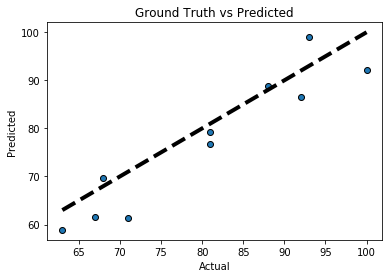

In [66]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, pred, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

#### Boost through GradientBoostRegressor By using Parameters

In [67]:
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [68]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)


y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('R2 Score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.9999500168448907
Mean squared error: 89.65
R2 Score: 0.39


#### Lets Visualize the Goodness of the Prediction

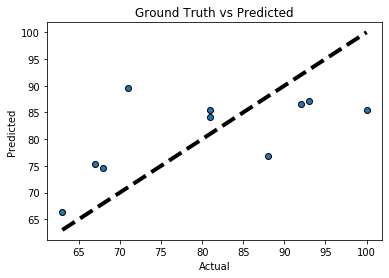

In [69]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

### Linear Regression using Recursion

In [70]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,random_state=55,test_size=0.20)

In [71]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,X,Y):
    max_r_score=0
    for r_state in range(42,100):
        train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.20,random_state=r_state)
        regr.fit(train_X,train_Y)
        y_pred = regr.predict(test_X)
        r2_scr=r2_score(test_Y,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state

In [72]:
# Lets use LinearRegression and check the max r2 score corresponding to different state
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = maxr2_score(lreg,X,Y)

r2 score corresponding to  42 is 0.8040230760493944
r2 score corresponding to  43 is -0.5270300230490625
r2 score corresponding to  44 is 0.7532264252118439
r2 score corresponding to  45 is 0.8078201120486412
r2 score corresponding to  46 is 0.3121404806109399
r2 score corresponding to  47 is 0.6500055183796503
r2 score corresponding to  48 is 0.8921815863716348
r2 score corresponding to  49 is -0.24162824704294716
r2 score corresponding to  50 is 0.6125549749305127
r2 score corresponding to  51 is 0.44100750240086484
r2 score corresponding to  52 is 0.5496042930628086
r2 score corresponding to  53 is 0.4295889236111696
r2 score corresponding to  54 is 0.6728792808445299
r2 score corresponding to  55 is 0.8354205204519244
r2 score corresponding to  56 is 0.2245178930919749
r2 score corresponding to  57 is -0.5755020933495225
r2 score corresponding to  58 is 0.24993207729322697
r2 score corresponding to  59 is -0.28561712297417285
r2 score corresponding to  60 is -0.6780104490852128
r2 

### KNN Model

In [73]:
from sklearn.neighbors import KNeighborsRegressor
knr1 = KNeighborsRegressor()
knr1.fit(train_X,train_Y)
knr1.score(train_X,train_Y)
predicted=knr1.predict(test_X)
print("Mean squared error of knn: %.2f"% mean_squared_error(test_Y,predicted))
print('R2 Score of knn: %.2f' % r2_score(test_Y, predicted))

Mean squared error of knn: 75.15
R2 Score of knn: 0.05


### Lets use grid_search to find optimal value of n_neighbors for KNN Model

In [74]:
#Lets use the Grid Search to Find the Optimal Value of n_neighbors in Knn Model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
neighbors={"n_neighbors":range(1,20)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=10)
gknr.fit(X,Y)
gknr.best_params_

{'n_neighbors': 1}

In [75]:
#Lets Use Knn Regression and Check max r2 score corresponding to different random states
knr = KNeighborsRegressor(n_neighbors=1)
r_state = maxr2_score(knr,X,Y)

r2 score corresponding to  42 is -0.1133628879037365
r2 score corresponding to  43 is -1.476780185758514
r2 score corresponding to  44 is 0.1853344077356971
r2 score corresponding to  45 is -0.20135746606334837
r2 score corresponding to  46 is -1.6788698766414645
r2 score corresponding to  47 is -0.191747572815534
r2 score corresponding to  48 is 0.2603686635944701
r2 score corresponding to  49 is 0.5847375017407046
r2 score corresponding to  50 is -0.6625965611761773
r2 score corresponding to  51 is -1.4187012987012988
r2 score corresponding to  52 is -0.2549668874172186
r2 score corresponding to  53 is -1.8371278458844134
r2 score corresponding to  54 is -0.22212230215827322
r2 score corresponding to  55 is -0.0045438657811953664
r2 score corresponding to  56 is -1.5320293398533003
r2 score corresponding to  57 is -1.7422796181920268
r2 score corresponding to  58 is 0.04617414248021112
r2 score corresponding to  59 is -1.7785675232367417
r2 score corresponding to  60 is -0.8654042988

In [76]:
#Lets check the mean r2 score of both linear regression model and knn regression 
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,X,Y,cv=5,scoring="r2").mean())
print("Stadard deviation in r2 score for KNN Regression:",cross_val_score(knr,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: -0.33434511806870876
Standard deviation in r2 score for Linear Regression: 1.7721685821580917

Mean r2 score for KNN Regression:  -1.927663732071831
Stadard deviation in r2 score for KNN Regression: 3.0566797898498237


### Boosting Linear Regression

In [77]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg1=AdaBoostRegressor()
add_reg1=AdaBoostRegressor(base_estimator=lreg,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  -1.2645459155889196
Standard deviation in r2 score for ada boosting Regression:  3.236600612056939


### Boosting KNN model

In [78]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg2=AdaBoostRegressor()
add_reg2=AdaBoostRegressor(base_estimator=knr,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  -1.2213607005055378
Standard deviation in r2 score for ada boosting Regression:  3.114966233776553


#### Lets check lasso regression and best value of alpha

In [79]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg,parameters,cv=10)
clf.fit(X,Y)
clf.best_params_

{'alpha': 0.01}

In [80]:
#Lets use cross val score with Lasso
lasso_grs=Lasso(alpha = 0.01)
print("Mean r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression:  -0.22834533176286248
Standard deviation in r2 score for Lasso Regression:  1.828729919059558


### Boosting Lasso Regressor

In [81]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg3=AdaBoostRegressor()
add_reg3=AdaBoostRegressor(base_estimator=lasso_grs,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg3,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg3,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  -0.628176035430657
Standard deviation in r2 score for ada boosting Regression:  1.9183546310321382


### Support Vector Regression

In [82]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svr1 = SVR(kernel = "linear")
svr1.fit(train_X,train_Y)
svr1.score(train_X,train_Y)
y_pred1=svr1.predict(test_X)
print("Mean squared error of linear svc: %.2f"% mean_squared_error(test_Y,y_pred1))
print('R2 Score of linear svc: %.2f' % r2_score(test_Y, y_pred1))

Mean squared error of linear svc: 45.83
R2 Score of linear svc: 0.42


#### Grid Search CV in Support Vector Regressor

In [83]:
from sklearn.svm import SVR
import numpy as np
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
svr = SVR()
grs = GridSearchCV(svr, parameters,refit = True, verbose = 3)
grs.fit(X,Y)
grs.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear ..................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear, score=-0.301, total=   0.1s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear, score=0.438, total=   0.4s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear ..................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear, score=0.684, total=   0.1s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf .....................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf, score=-0.074, total=   0.0s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf .....................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf, score=-0.034, total=   0.0s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf .....................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf, score=-0.258, total=   0.0s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly ....................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly, score=-0.025, total=   0.0s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly ....................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly, score=0.041, total=   0.0s
[CV] C=1.5, epsi

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  C=1.5, epsilon=0.1, gamma=0.0001, kernel=linear, score=0.438, total=   0.4s
[CV] C=1.5, epsilon=0.1, gamma=0.0001, kernel=linear .................
[CV]  C=1.5, epsilon=0.1, gamma=0.0001, kernel=linear, score=0.684, total=   0.1s
[CV] C=1.5, epsilon=0.1, gamma=0.0001, kernel=rbf ....................
[CV]  C=1.5, epsilon=0.1, gamma=0.0001, kernel=rbf, score=-0.044, total=   0.0s
[CV] C=1.5, epsilon=0.1, gamma=0.0001, kernel=rbf ....................
[CV]  C=1.5, epsilon=0.1, gamma=0.0001, kernel=rbf, score=-0.001, total=   0.0s
[CV] C=1.5, epsilon=0.1, gamma=0.0001, kernel=rbf ....................
[CV]  C=1.5, epsilon=0.1, gamma=0.0001, kernel=rbf, score=-0.364, total=   0.0s
[CV] C=1.5, epsilon=0.1, gamma=0.0001, kernel=poly ...................
[CV]  C=1.5, epsilon=0.1, gamma=0.0001, kernel=poly, score=-1881804.347, total=   2.0s
[CV] C=1.5, epsilon=0.1, gamma=0.0001, kernel=poly ...................
[CV]  C=1.5, epsilon=0.1, gamma=0.0001, kernel=poly, score=-473732.078, total=   3.

[CV]  C=1.5, epsilon=0.3, gamma=0.0001, kernel=linear, score=0.442, total=   0.3s
[CV] C=1.5, epsilon=0.3, gamma=0.0001, kernel=linear .................
[CV]  C=1.5, epsilon=0.3, gamma=0.0001, kernel=linear, score=0.687, total=   0.1s
[CV] C=1.5, epsilon=0.3, gamma=0.0001, kernel=rbf ....................
[CV]  C=1.5, epsilon=0.3, gamma=0.0001, kernel=rbf, score=-0.045, total=   0.0s
[CV] C=1.5, epsilon=0.3, gamma=0.0001, kernel=rbf ....................
[CV]  C=1.5, epsilon=0.3, gamma=0.0001, kernel=rbf, score=-0.000, total=   0.0s
[CV] C=1.5, epsilon=0.3, gamma=0.0001, kernel=rbf ....................
[CV]  C=1.5, epsilon=0.3, gamma=0.0001, kernel=rbf, score=-0.362, total=   0.0s
[CV] C=1.5, epsilon=0.3, gamma=0.0001, kernel=poly ...................
[CV]  C=1.5, epsilon=0.3, gamma=0.0001, kernel=poly, score=-1881725.170, total=   1.9s
[CV] C=1.5, epsilon=0.3, gamma=0.0001, kernel=poly ...................
[CV]  C=1.5, epsilon=0.3, gamma=0.0001, kernel=poly, score=-473757.734, total=   3.

[CV]  C=10, epsilon=0.5, gamma=0.0001, kernel=linear, score=-0.855, total=   0.6s
[CV] C=10, epsilon=0.5, gamma=0.0001, kernel=linear ..................
[CV]  C=10, epsilon=0.5, gamma=0.0001, kernel=linear, score=-5.082, total=   0.2s
[CV] C=10, epsilon=0.5, gamma=0.0001, kernel=rbf .....................
[CV]  C=10, epsilon=0.5, gamma=0.0001, kernel=rbf, score=-0.030, total=   0.0s
[CV] C=10, epsilon=0.5, gamma=0.0001, kernel=rbf .....................
[CV]  C=10, epsilon=0.5, gamma=0.0001, kernel=rbf, score=0.122, total=   0.0s
[CV] C=10, epsilon=0.5, gamma=0.0001, kernel=rbf .....................
[CV]  C=10, epsilon=0.5, gamma=0.0001, kernel=rbf, score=-0.262, total=   0.0s
[CV] C=10, epsilon=0.5, gamma=0.0001, kernel=poly ....................
[CV]  C=10, epsilon=0.5, gamma=0.0001, kernel=poly, score=-83693641.980, total=   1.0s
[CV] C=10, epsilon=0.5, gamma=0.0001, kernel=poly ....................
[CV]  C=10, epsilon=0.5, gamma=0.0001, kernel=poly, score=-21052991.922, total=   5.3s


[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:  1.4min finished


{'C': 1.5, 'epsilon': 0.5, 'gamma': 1e-07, 'kernel': 'linear'}

In [84]:
svr_grs=SVR(C=1.5, epsilon=0.5, gamma=1e-07, kernel='linear')
print("Mean r2 score for ada boosting Regression: ",cross_val_score(svr_grs,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(svr_grs,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  -0.3193443543968458
Standard deviation in r2 score for ada boosting Regression:  1.2206243176713232


### Boosting Support Vector Machine

In [85]:
from sklearn.ensemble import AdaBoostRegressor

In [86]:
ada_reg4=AdaBoostRegressor()
add_reg4=AdaBoostRegressor(base_estimator=svr_grs,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg4,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg4,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  -0.7833404551562426
Standard deviation in r2 score for ada boosting Regression:  2.0827606036106454


### Decision Tree Regressor

In [87]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
  

dtregressor = DecisionTreeRegressor(random_state = 0)  
  
 
dtregressor.fit(X, Y) 

dtregressor.score(train_X,train_Y)
y_pred4=dtregressor.predict(test_X)
print("Mean squared error of Decision Tree Regressor: %.2f"% mean_squared_error(test_Y,y_pred4))
print('R2 Score : %.2f' % r2_score(test_Y, y_pred4))

Mean squared error of Decision Tree Regressor: 0.00
R2 Score : 1.00


### Decision Tree Regressor Using GridSearchCV

In [88]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X,Y)
print("R-Squared on train dataset={}".format(dtm.score(test_X,test_Y)))

dtm.fit(test_X,test_Y)   
print("R-Squaredon test dataset={}".format(dtm.score(test_X,test_Y)))

R-Squared on train dataset=0.9517068624024234
R-Squaredon test dataset=0.8392170569730864


In [89]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }


grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)

grid_cv_dtm.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=4,
                                             max_features=None,
                                             max_leaf_nodes=10,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=5,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                      

In [90]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::-0.4601068022977323
Best Hyperparameters::
{'criterion': 'mae', 'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_leaf': 20, 'min_samples_split': 10}


### Boosting Decision Tree

In [91]:
from sklearn.ensemble import AdaBoostRegressor

In [92]:
ada_reg5=AdaBoostRegressor()
add_reg5=AdaBoostRegressor(base_estimator=dtm,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(add_reg5,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(add_reg5,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  -0.9914697690428197
Standard deviation in r2 score for ada boosting Regression:  3.213620447218007


### Random Forest Regressor

In [93]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators=5)
rfregressor.fit(train_X, train_Y)
y_pred5 = rfregressor.predict(test_X)
print("Mean squared error of poly svc: %.2f"% mean_squared_error(test_Y,y_pred5))
print('R2 Score : %.2f' % r2_score(test_Y, y_pred5))

Mean squared error of poly svc: 67.03
R2 Score : 0.16


#### Random Forest Regressor with GridSearchCV

In [94]:
rf_gs = RandomForestRegressor(n_estimators=100)

In [95]:
n_features = X.shape[1]

In [96]:
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(rf_gs, n_iter=20, 
            param_distributions=dict(
                                          max_depth=np.arange(5,20+1), 
                                          max_features=np.arange(1, n_features+1)
                                    )
         )
grid.fit(X, Y)
print(grid.best_params_)

{'max_features': 8, 'max_depth': 18}


In [97]:
rf_gss = RandomForestRegressor(max_features = 8, max_depth = 17)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  -0.5215339303796579
Standard deviation in r2 score for ada boosting Regression:  1.7511077908497334


#### Boosting RandomForestRegressor

In [98]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg6=AdaBoostRegressor()
add_reg6=AdaBoostRegressor(base_estimator=rfregressor,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(add_reg6,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(add_reg6,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  -0.7441964717011501
Standard deviation in r2 score for ada boosting Regression:  1.3902781184249742


#### NOTE::Here I am choosing lg here r2 score(0.80) and mean squared error(29.22)

In [99]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(lg,'Baseball.pkl')

['Baseball.pkl']